## In this Jupyter Notebook file, we will be looking at some indicators of diabetes in the United States. 

Download an updated copy of the dataset here: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [7]:
#First do import statements, we will be taking advantage of sci-kit learn for the majority of our machine learning functions

import pandas as pd
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import tree
import matplotlib.pyplot as plt

In [8]:
#Data Comes from a cleaned version of the Behavioral Risk Factor Surveillance System (BRFSS) survey completed by the CDC
#https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#### We want to take a better look at our data, so we use panda's describe feature to get a quick look at all of the columns in our data set. What do the variables actually mean?

In [9]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Text(0.5, 1.0, 'Histogram of Diabetes Across Population')

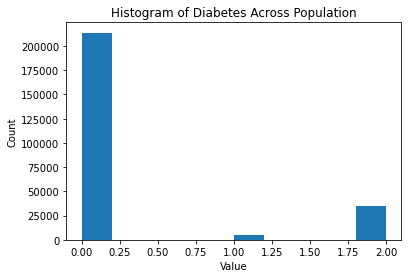

In [18]:
#How is Diabetes Distributed Across the Dataset?

plt.hist(df["Diabetes_012"])
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Histogram of Diabetes Across Population")

### Great, we have taken a closer look at our data. Time to start modeling!


In [11]:
#Diabetes_012 is our response variable. A value of 0 indicates no diabetes, 1 is prediabetes, and 2 is someone who is a diabetic

#To make our set of independent variables, we drop the response variable from the dataset
X = df.drop(columns=["Diabetes_012"])
y = df["Diabetes_012"]

#Now we have to split our data into training and testing sets; I will make usage of the train_test_split function from sklearn
#I use a test size of 0.10, which is reasonably small.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10)

#Make a blank model using the DecisionTreeClassifier() function from sklearn
model = DecisionTreeClassifier()
#Fit the model to the TRAINING DATA, we will have to test our model shortly
model.fit(X_train,y_train)

#Great we now have a model! Let's test it to see how accurate it matches the testing data!
#First, make an array of predictions from the testing data
predictions = model.predict(X_test)
#Using the accuracy_score function from sklearn.metrics, we get a value from 0 to 1. Scores closer to 1 indicate well-fitting models!
accuracy_score(y_test,predictions)


0.7697887101860612

### Initial Results
That's a decent accuracy score, but using solely accuracy to rate a machine learning model is generally bad practice.
Some datasets will be imbalanced, which is actually true of many health datasets. Look above at the Diabetes_012 column. It's 25%, 50%, and 75% quartiles are all 0! This is an unbalanced dataset! Let's use an F1 score instead.

In [12]:
predictions = model.predict(X_test)
print(y_test)
print(predictions)
#Because our target variabel is not binary (takes values 0,1,and2) we have to specify the average method
f1_score(y_test,predictions,average='weighted')

136692    0.0
53280     0.0
36658     0.0
40512     0.0
221811    2.0
         ... 
24162     0.0
183513    0.0
99874     0.0
19145     0.0
53285     2.0
Name: Diabetes_012, Length: 25368, dtype: float64
[0. 0. 0. ... 0. 0. 0.]


0.7748052897272785

Again, a relatively high F1 Score. However, decision tree classifiers themselves are not amazingly robust. Instead, we should be using a randomized forest classifier module. Randomized forests are a series of many different decision trees.

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
#We can still use the same training data set as above
rf.fit(X_train,y_train)


RandomForestClassifier()

In [14]:
preds = rf.predict(X_test)
accuracy_score(y_test,preds)

0.8412567013560391

By combining the results of 100 decision trees, our accuracy score jumps by about 7%! We can now use our model to predict diabetes risk, by providing the appropriate input data.

In [15]:
#Example prediction for someone with high blood pressure
diab = rf.predict([[1,1,1,36,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0]])
print(diab)

[0.]


So even with the above health conditions, our forest does not predict this person will be diabetic.